In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('C:/Users/dbzfa/OneDrive/Desktop/3.01. Country clusters.csv')

In [4]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [7]:
data.describe()

,Latitude,Longitude
count,6.000000,6.000000
mean,38.971667,-9.531667
std,32.155820,86.523904
min,-25.450000,-103.770000
25%,45.415000,-73.232500
50%,48.950000,-0.065000
75%,53.295000,8.400000
max,62.400000,133.110000


<function matplotlib.pyplot.show(close=None, block=None)>

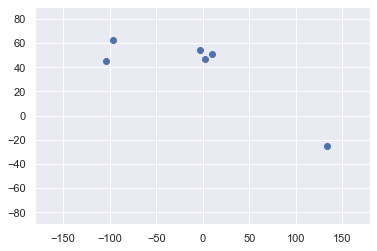

In [9]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [10]:
x = data.iloc[:,1:3]

In [11]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [22]:
kmeans = KMeans(3)

In [23]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [24]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([2, 2, 1, 1, 1, 0])

In [25]:
data_with_clusters = data.copy()

In [26]:
data_with_clusters['Cluster'] = identified_cluster

In [27]:
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


C:\Users\dbzfa\anaconda3\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<function matplotlib.pyplot.show(close=None, block=None)>

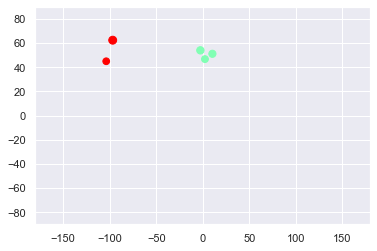

In [28]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [29]:
data_mapped = data.copy()

In [30]:
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})

In [31]:
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [32]:
x = data_mapped.iloc[:,3:4]

In [33]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [38]:
kmean = KMeans(3)

In [39]:
kmean.fit(x)

KMeans(n_clusters=3)

In [40]:
identified_clusters = kmean.fit_predict(x)

In [41]:
identified_clusters

array([0, 0, 2, 0, 1, 0])

In [42]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_cluster

In [43]:
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


## WCSS

In [44]:
kmeans.inertia_

288.10523333333333

In [47]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\dbzfa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbzfa\AppData\Local\Temp\ipykernel_3904\4282179897.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\dbzfa\AppData\Local\Temp\ipykernel_3904\4282179897.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\dbzfa\AppData\Local\Temp\ipykernel_3904\4282179897.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(x)


In [46]:
wcss

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]